In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
df = pd.read_csv("../data/processed_data/vancouver_real_estate_district.csv", index_col = 0)


In [3]:
df.head()

address  bedroom  bathroom  square_footage      price  \
index                                                                        
0        1001 Homer St #1901      1.0       1.0           505.0   658000.0   
1      1003 Burnaby St #1106      1.0       1.0           411.0   485000.0   
2        1005 W 7th Ave #303      1.0       1.0           981.0   899000.0   
3       1008 Cambie St #2906      1.0       NaN           802.0   998000.0   
4       1009 Expo Blvd #1903      3.0       2.0          1146.0  1388000.0   

      postalCode   latitude  longitude  \
index                                    
0        V6B 1M9        NaN        NaN   
1        V6E 4R7        NaN        NaN   
2        V6H 1B2        NaN        NaN   
3        V6B 6J7  49.275743   -123.118   
4        V6Z 2V9        NaN        NaN   

                                           property_link discrepancies  \
index                                                                    
0      https://www.redfin.com/bc/vancouver/1001-Homer...           NaN   
1      https://www.redfin.com/bc/vancouver/1003-Burna...           NaN   
2      https://www.redfin.com/bc/vancouver/1005-W-7th...           NaN   
3      https://www.redfin.ca/bc/vancouver/1008-Cambie...           NaN   
4      https://www.redfin.com/bc/vancouver/1009-Expo-...           NaN   

      neighborhood  
index               
0              NaN  
1              NaN  
2              NaN  
3         Downtown  
4              NaN

In [4]:
df.describe()

bedroom     bathroom  square_footage         price     latitude  \
count  4910.000000  4499.000000     4916.000000  5.001000e+03  4780.000000   
mean      2.868228     2.360636     1655.611880  2.141708e+06    49.255135   
std       1.920700     1.459214     1457.594077  2.508197e+06     0.024617   
min       0.000000     0.500000      101.000000  5.400000e+04    49.181936   
25%       2.000000     1.000000      775.000000  8.290000e+05    49.235965   
50%       2.000000     2.000000     1198.000000  1.489000e+06    49.260679   
75%       4.000000     3.000000     2040.000000  2.488000e+06    49.276339   
max      14.000000    12.000000    26002.000000  4.980000e+07    49.313628   

         longitude  
count  4780.000000  
mean   -123.110583  
std       0.041048  
min    -123.224001  
25%    -123.131178  
50%    -123.117413  
75%    -123.086445  
max    -122.992793

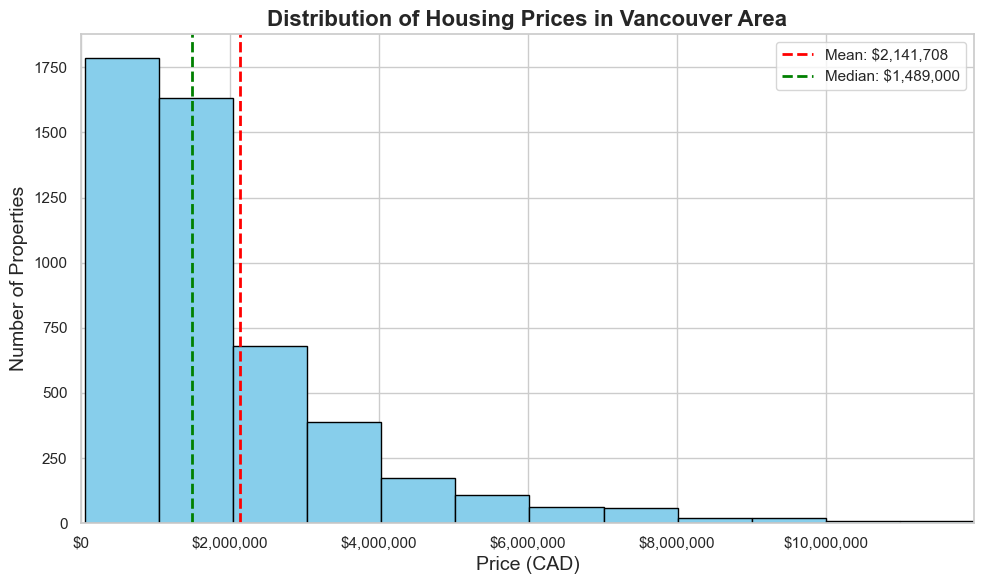

In [5]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
price_data = df["price"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Prices in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Price (CAD)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x):,}'))

# Add vertical lines for key statistics
mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, price_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


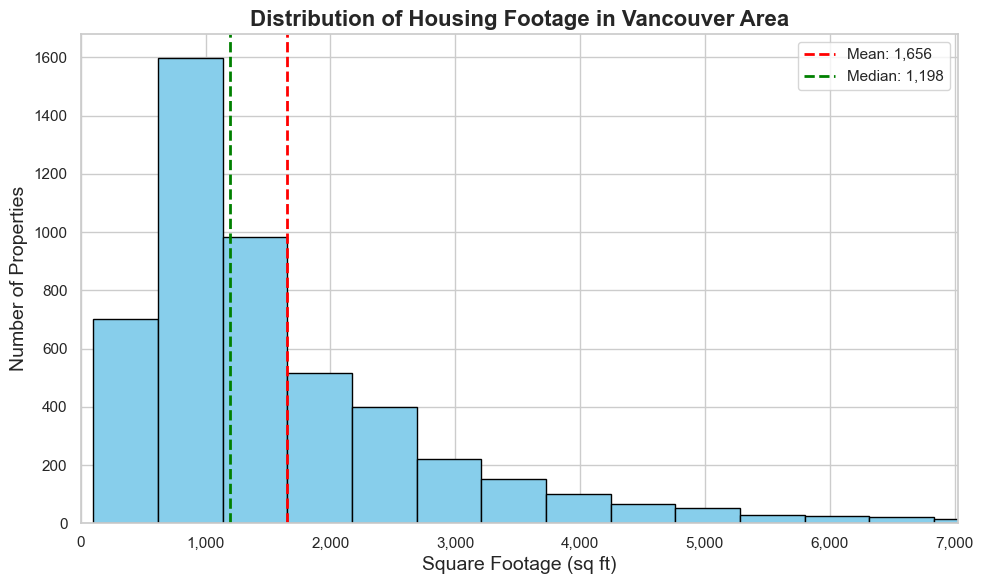

In [6]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
footage_data = df["square_footage"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(footage_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Footage in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Square Footage (sq ft)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Add vertical lines for key statistics
mean_footage = footage_data.mean()
median_footage = footage_data.median()

plt.axvline(mean_footage, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_footage:,.0f}')
plt.axvline(median_footage, color='green', linestyle='--', linewidth=2, label=f'Median: {median_footage:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, footage_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


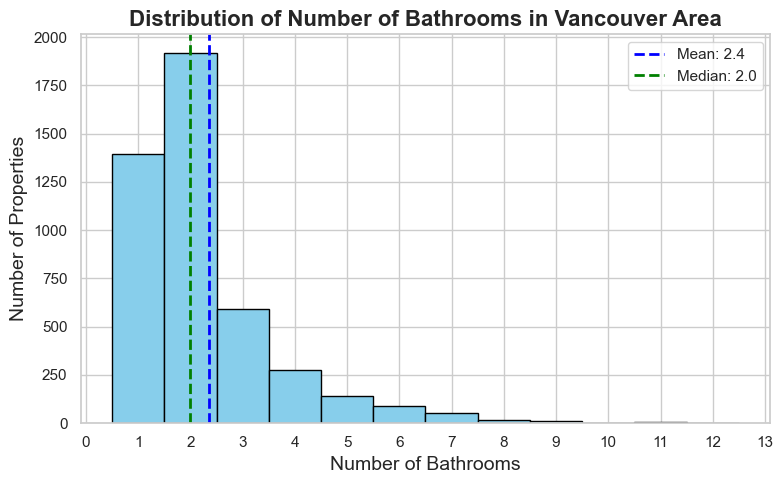

In [7]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bath_data = df["bathroom"].dropna()
plt.hist(bath_data, bins=range(1, int(bath_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Number of Bathrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bath = bath_data.mean()
median_bath = bath_data.median()
plt.axvline(mean_bath, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bath:.1f}')
plt.axvline(median_bath, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bath:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


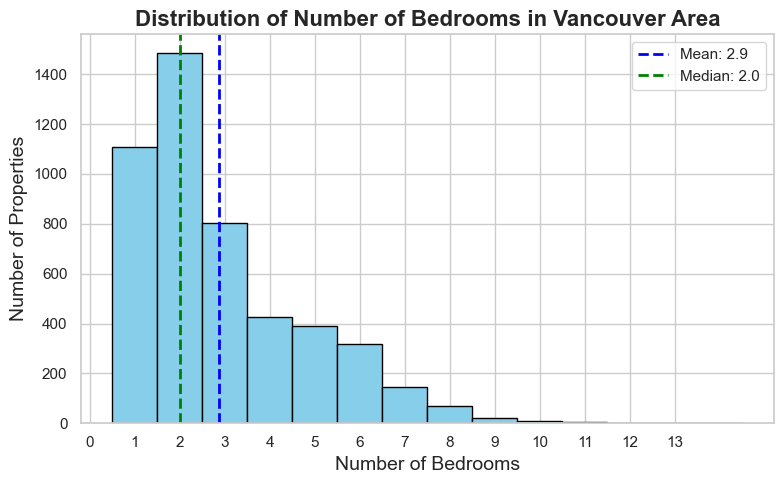

In [8]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bed_data = df["bedroom"].dropna()
plt.hist(bed_data, bins=range(1, int(bed_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Number of Bedrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bed = bed_data.mean()
median_bed = bed_data.median()
plt.axvline(mean_bed, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bed:.1f}')
plt.axvline(median_bed, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bed:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
df_graph = df.iloc[:, :-2].dropna()


center_lat = df_graph['latitude'].mean()
center_lon = df_graph['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m) 
for index, row in df_graph.iterrows():
    html = f"""
        <b>Address:</b> {row['address']}<br>
        <b>Price:</b> ${row['price']}<br>  
        <b>Bedrooms:</b> {row['bedroom']}<br>
        <b>Bathrooms:</b> {row['bathroom']}<br>
        <b>Sq. Footage:</b> {row['square_footage']}
    """  
    iframe = folium.IFrame(html=html, width=200, height=150) 
    popup = folium.Popup(iframe, max_width=2650) 


    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup
    ).add_to(marker_cluster)


m.save("../data/visualization/map_visualization.html")
m

In [10]:
price_per_sqft = (df['price'] / df['square_footage']).reset_index(drop=True)
neighborhood = df['neighborhood'].reset_index(drop=True)
neighborhood_price = pd.concat([price_per_sqft, neighborhood], axis=1)
neighborhood_price.columns = ['price_per_sqft', 'neighborhood']

neighborhood_counts = neighborhood.value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'listing_count']

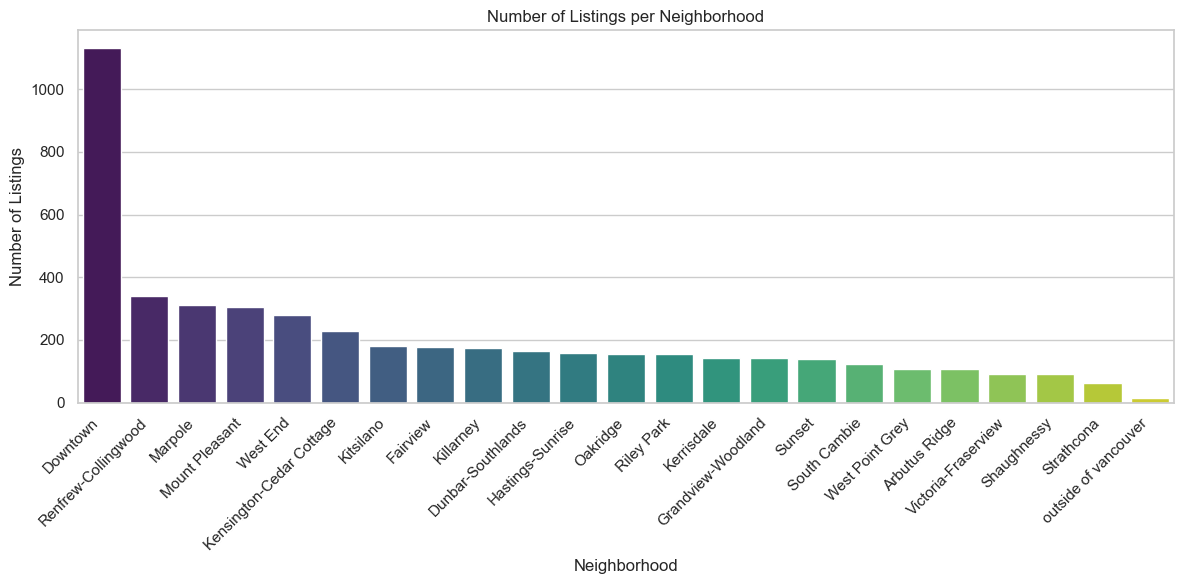

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='neighborhood',
    y='listing_count',
    hue='neighborhood', 
    data=neighborhood_counts,
    palette='viridis',
    legend=False
)
plt.title('Number of Listings per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Listings')
plt.xlabel('Neighborhood')
plt.tight_layout()
plt.show()

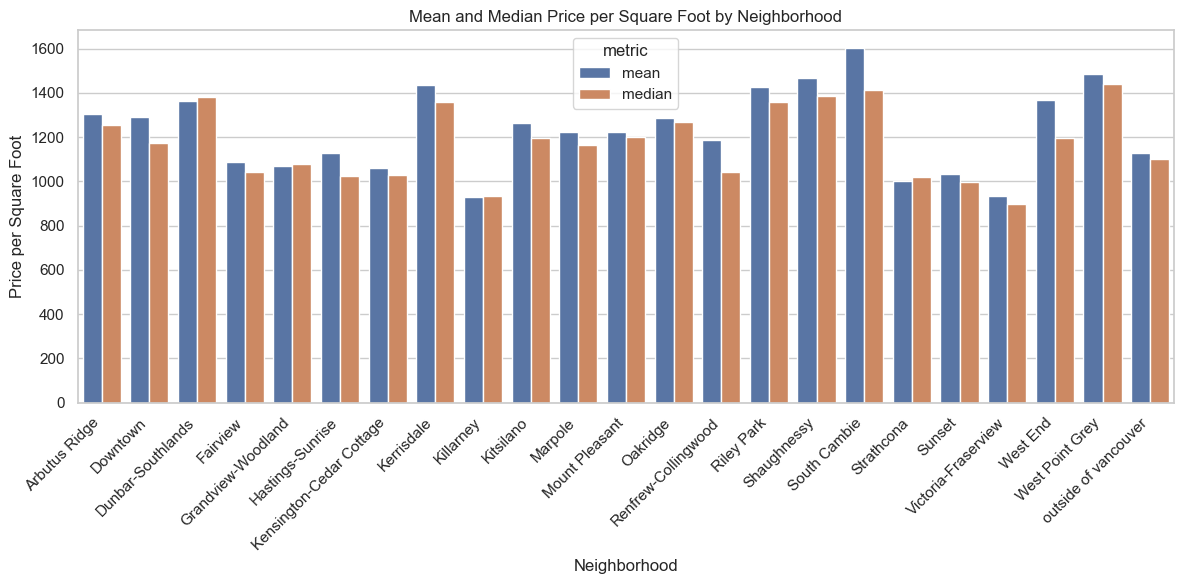

In [12]:
summary = neighborhood_price.groupby('neighborhood')['price_per_sqft'].agg(['mean', 'median']).reset_index()
summary_melted = summary.melt(id_vars='neighborhood', var_name='metric', value_name='price_per_sqft')

plt.figure(figsize=(12, 6))
sns.barplot(x='neighborhood', y='price_per_sqft', hue='metric', data=summary_melted)
plt.title('Mean and Median Price per Square Foot by Neighborhood')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Price per Square Foot')
plt.xlabel('Neighborhood')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

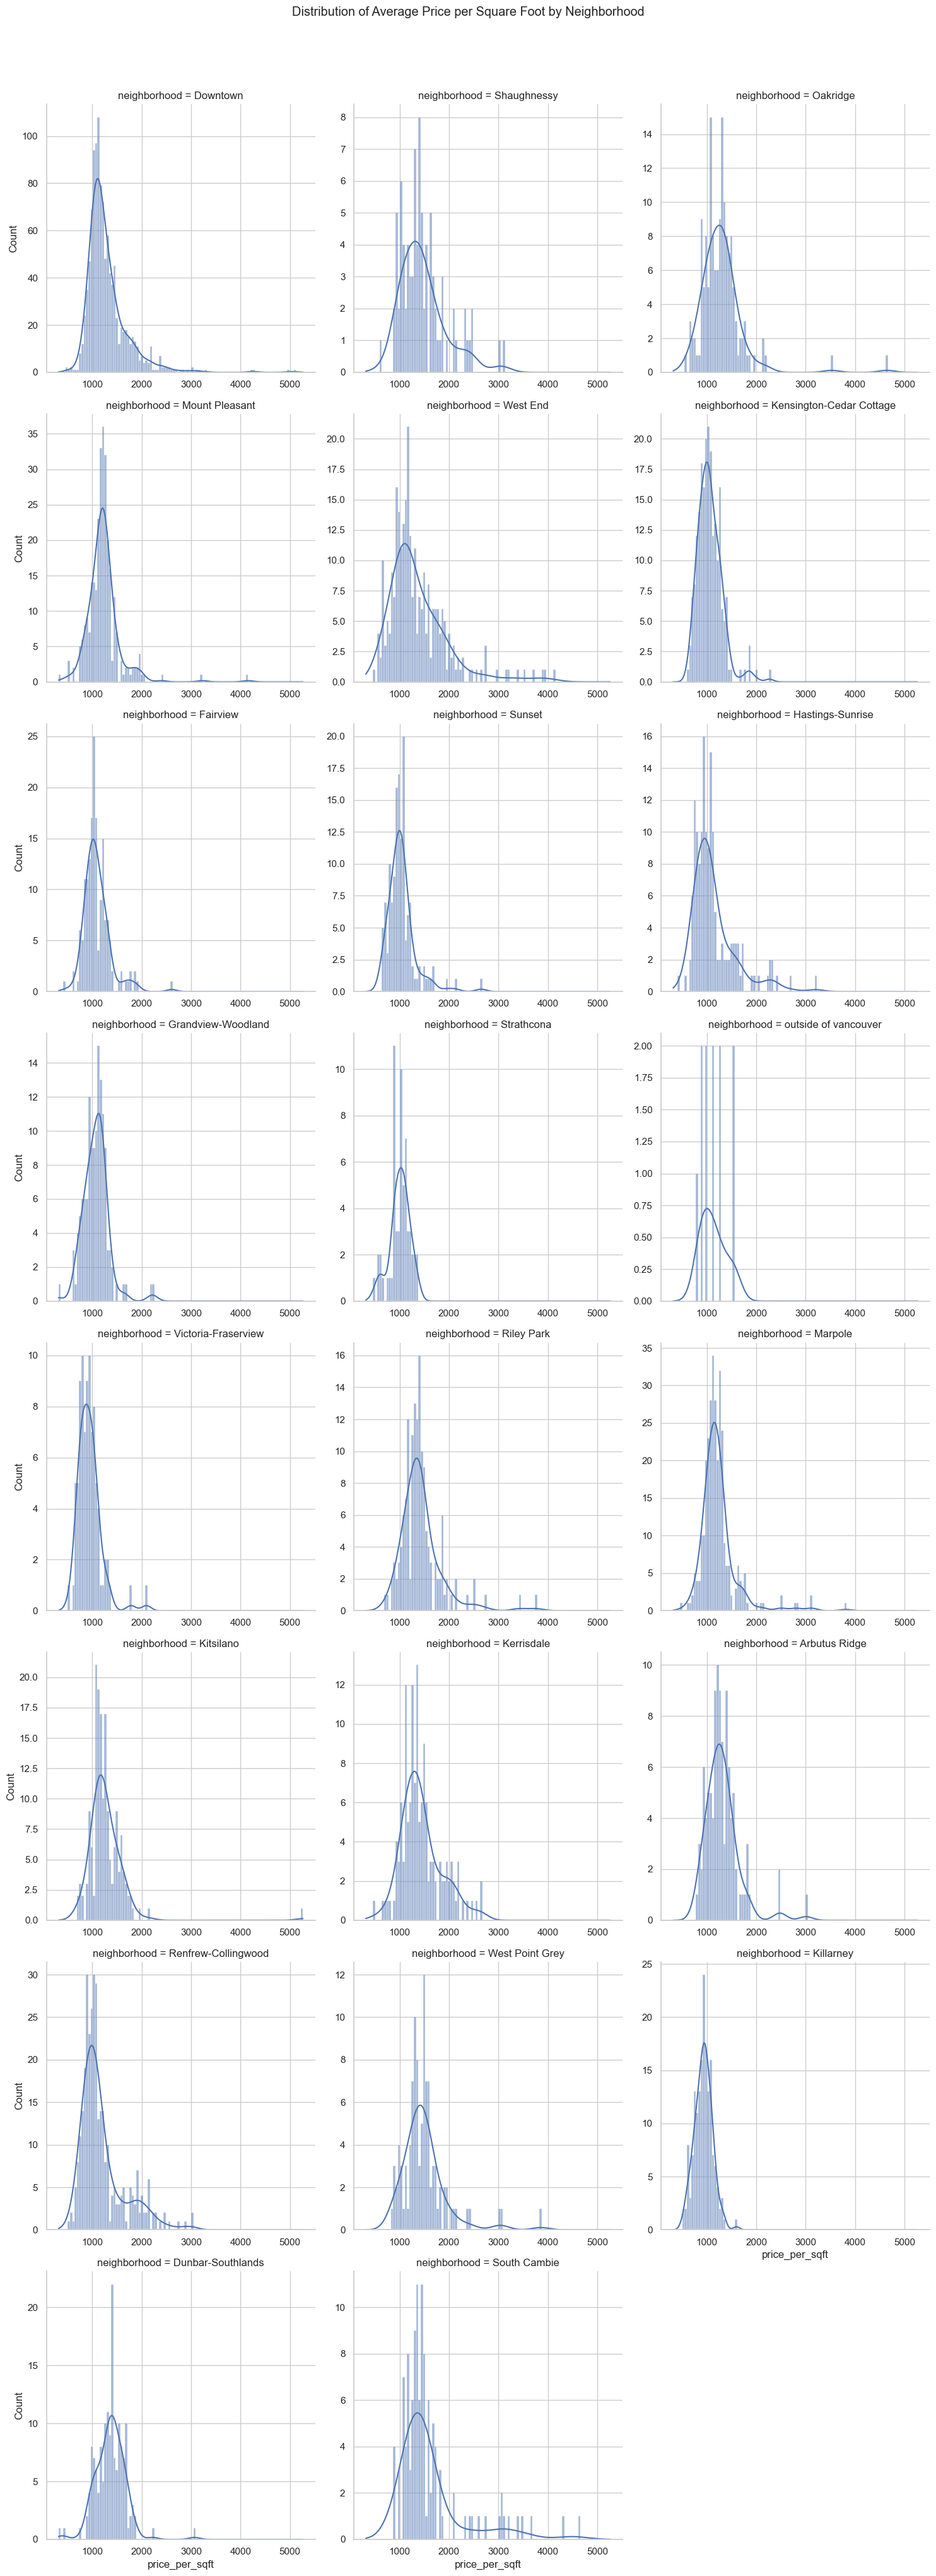

In [13]:
plt.figure(figsize=(12, 8)) 
sns.displot(data=neighborhood_price, x='price_per_sqft', col='neighborhood', col_wrap=3, kde=True, facet_kws={'sharex': False, 'sharey': False})
plt.suptitle('Distribution of Average Price per Square Foot by Neighborhood', y=1.02)
plt.tight_layout()
plt.show()